# [DAY_7] Horizental_Bar_Chart_Color_Bold_Text

In [1]:
import numpy as np
import matplotlib
from matplotlib import transforms, pyplot as plt

%matplotlib inline
#%matplotlib

In [2]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1 = '#F79747'

In [3]:
# matplotlib에는 서로 다른 색상으로 텍스트를 그리는 기능이 없습니다. 이를 구현해 보겠습니다.
def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))  # 색상 목록을 반전시킵니다.
    t = ax.transData  # 변환을 위한 객체를 설정합니다.
    canvas = ax.figure.canvas  # 캔버스를 설정합니다.

    # 텍스트를 역순으로 처리합니다.
    for i, line in enumerate(reversed(text.split('\n'))):
        # 줄을 '||'로 나누어 문자열을 분리합니다.
        strings = line.split('||')
        # 각 문자열과 색상을 순회하면서 텍스트를 그립니다.
        for s, c in zip(strings, colors[i]):
            # 지정된 위치에 텍스트를 그리고 색상을 적용합니다.
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())  # 텍스트를 렌더링합니다.
            ex = text.get_window_extent()  # 텍스트의 범위를 가져옵니다.
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')  # 변환을 업데이트합니다.

        # 줄 간격을 적용하기 위해 변환을 업데이트합니다.
        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')
# 이 함수는 지정된 위치(x, y)에서 여러 색상의 텍스트를 그립니다. 
# 주어진 텍스트는 줄 바꿈 ('\n')을 기준으로 역순으로 처리되며, 
# 각 줄의 텍스트는 '||'로 구분됩니다. 그런 다음 각 줄의 각 부분에 해당하는 색상이 적용됩니다. 
# 이 함수를 사용하면 여러 가지 색상의 텍스트를 편리하게 그릴 수 있습니다.

In [4]:
# 플롯 폰트 패밀리를 Arial로 설정
plt.rcParams['font.family'] = 'NanumGothic'
# 수학 텍스트 굵게 및 이탤릭체 폰트 패밀리를 Arial로 설정
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'NanumGothic:bold'
matplotlib.rcParams['mathtext.it'] = 'NanumGothic:italic'

In [5]:
# 우려 사항 및 분포
X = ['앞 좌석 오디오/엔터테인먼트/내비게이션 컨트롤',
     '블루투스 시스템 사용이 어려움',
     '조향 시스템/핸들이 플레이가 많음',
     '블루투스 시스템 소리 품질이 낮음',
     '변속 시 거칠거나 지연됨',
     '과도한 바람 소음',
     '좌석 재질에 대한 우려 사항',
     '엔진이 비정상적으로 과도한 소음을 발생함',
     '주행 중 타이어 소음이 과도함',
     '엔진 출력이 예상보다 적음']
Y = [8.2, 8.6, 8.8, 10.0, 10.3, 11.0, 11.6, 11.6, 12.3, 12.9]


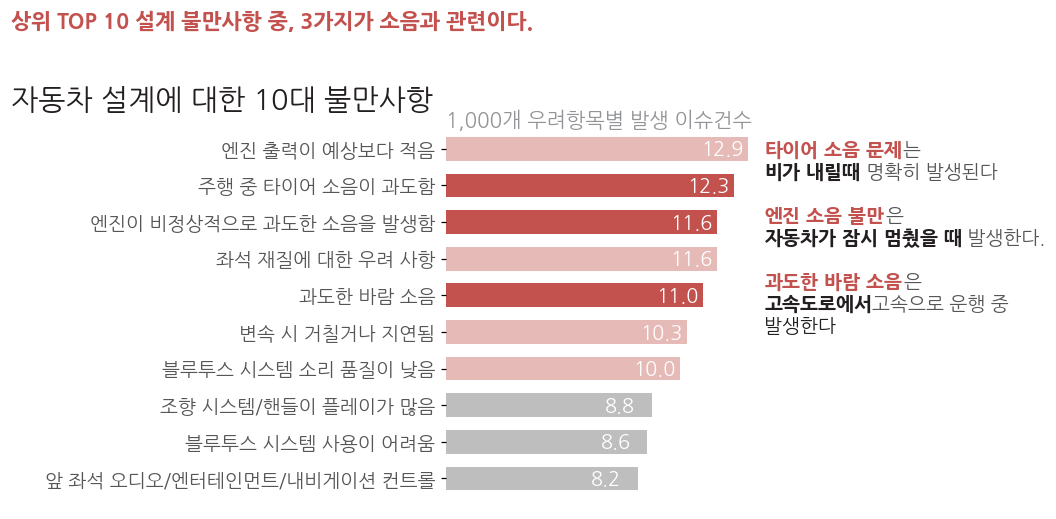

In [63]:
# 새로운 그림 생성
fig, ax1 = plt.subplots(figsize=(9, 4.65),  # 그림의 너비, 높이(인치)
                        dpi=110)            # 그림의 해상도

# 그림의 여백을 설정하여 subplot 레이아웃 조정
fig.subplots_adjust(left=0.445, right=0.765, top=0.77, bottom=0.01)

# 가로로 색상이 입혀진 막대 그리기
bars = ax1.barh(range(len(X)),
                Y,
                height=0.65,
                color=[GRAY9]*3 + [RED2]*2 + [RED1, RED2] + [RED1]*2 + [RED2])

# 각 막대에 수치 데이터 레이블 추가
for i, b in enumerate(bars):
    plt.text(b.get_width() - 2, b.get_y() + 0.15,
             str(Y[i]),
             fontsize=13,
             color='white')

# 축 객체의 속성 설정 (모든 문제에 대한 눈금과 라벨 표시)
plt.setp(ax1, yticks=np.arange(len(X)), yticklabels=X)

# 눈금, 눈금 라벨 및 그리드선의 모양 변경
ax1.tick_params(bottom='off', left='off', labelbottom='off')

# y 눈금 라벨의 모양 설정
for item in ax1.get_yticklabels():
    item.set_fontsize(12.5)
    item.set_color(GRAY3)

# 차트 테두리 제거
for spine in ax1.spines.values():
    spine.set_visible(False)

# 그림 제목
ax1.text(-18.6, 10.1, '자동차 설계에 대한 10대 불만사항', fontsize=19, color=GRAY1)
ax1.text(-18.6, 12.3, '상위 TOP 10 설계 불만사항 중, 3가지가 소음과 관련이다.',
         fontsize=14, color=RED1, fontweight='bold')
ax1.text(0, 9.6, '1,000개 우려항목별 발생 이슈건수', fontsize='13.5', color=GRAY7)

# X 축의 tick과 라벨 모두 없애기
ax1.tick_params(bottom=False, labelbottom=False)

# 우려사항 설명을 포함한 텍스트 노트 추가
# add text note with concerns description
rainbow_text(
    13.6, 4,
    '$\\bf{타이어\ 소음\ 문제}$||는\n'
    '$\\bf{비가\ 내릴때}$|| 명확히 발생된다\n'
    
    ' \n'
    
    '$\\bf{엔진\ 소음\ 불만}$||은\n'
    '$\\bf{자동차가\ 잠시\ 멈췄을\ 때}$|| 발생한다.\n'
    
    ' \n'
       
    '$\\bf{과도한\ 바람\ 소음}$||은\n'
    '$\\bf{고속도로에서\ }$||고속으로 운행 중\n'
    '발생한다',
    
    [[RED1, GRAY3], [GRAY1, GRAY3],
     
     [GRAY1],
     
     [RED1,GRAY3], [GRAY1, GRAY3],
     
     [GRAY1],
     
     [RED1, GRAY3], [GRAY1, GRAY3], [GRAY1]],
    
    spacing=22,
    ax=ax1,
    fontsize=12.5)